In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/all_players_stats_total.csv'
data = pd.read_csv(file_path)

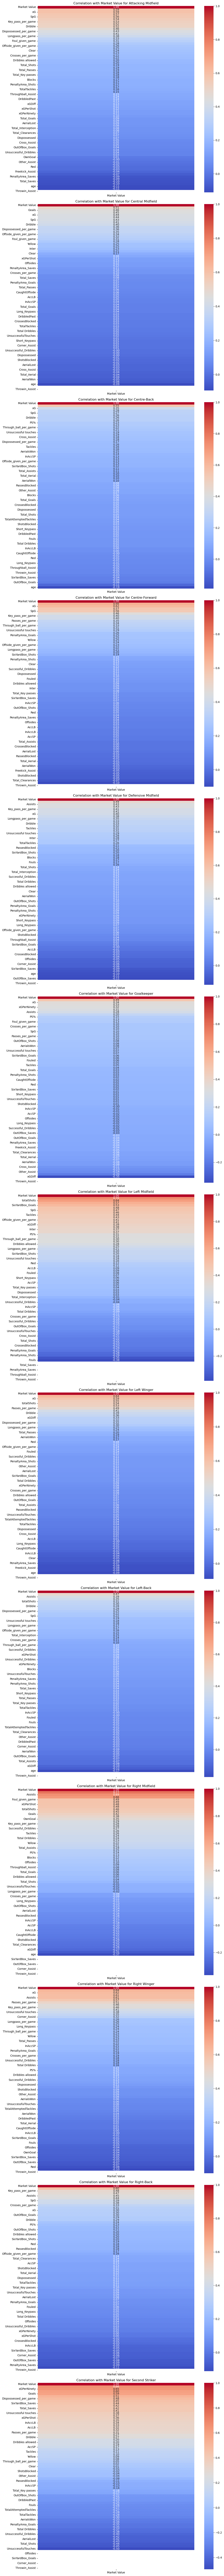

In [3]:
def plot_correlation_heatmaps(correlations_dict):
    fig, axes = plt.subplots(nrows=len(correlations_dict), ncols=1, figsize=(12, 10 * len(correlations_dict)))
    if len(correlations_dict) == 1:
        axes = [axes]

    for ax, (position, relevant_correlations) in zip(axes, correlations_dict.items()):
        sns.heatmap(relevant_correlations.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
        ax.set_title(f"Correlation with Market Value for {position}")

    plt.tight_layout()
    plt.show()

excluded_columns = ['Apps', 'Mins', 'Rating', 'MoM']
position_correlations_excluded = {}

for position, group in data.groupby('position'):
    numeric_columns = group.select_dtypes(include=[np.number]).drop(columns=excluded_columns, errors='ignore')
    correlation_matrix = numeric_columns.corr()
    if 'Market Value' in correlation_matrix:
        position_correlations_excluded[position] = correlation_matrix['Market Value'].sort_values(ascending=False)

plot_correlation_heatmaps(position_correlations_excluded)